<a href="https://colab.research.google.com/github/matheus-bp/JuliaCourseNotebooks/blob/master/workshop_matplotlib_tips_and_tricks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This cell takes around a minute to run. It's used to set up the LaTeX environment for fancier text rendering...
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-latex-extra is already the newest version (2021.20220204-1).
texlive-latex-recommended is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


# 1. DPI, figsize and fontsize
* **figsize** - Size of the figure in inches. If you set figsize = (6, 4) that represents an image of 6 inches x 4 inches. For example, text width in a paper is typically 7 inches and a single column in a two column format is around 3.3 inches.
* **DPI** - dots per inch (or pixels per inch). Matplotlib default DPI is 100, i.e. a 7x5 plot has a size of 700 x 500px (small!). You can specify DPI when saving or when initiating a figure (this is used for plt.show())
* **PPI** - points per inch. **Can't be changed**. All elements in the figure have their sizes set in points. Matplotlib uses 72 points per inch. A font of size 10pt is 10/72 inches in height. A linewidth of 1 has a width of 1/72 inch etc.


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Let's generate some fake data
def gen_data(n, noise=0, rescale=1):
  x = np.linspace(0, 1*rescale, n)
  y = x**2 - x + np.random.normal(size=len(x)) * noise
  return x, y

x, y = gen_data(n=11)
print(x)
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[ 0.   -0.09 -0.16 -0.21 -0.24 -0.25 -0.24 -0.21 -0.16 -0.09  0.  ]


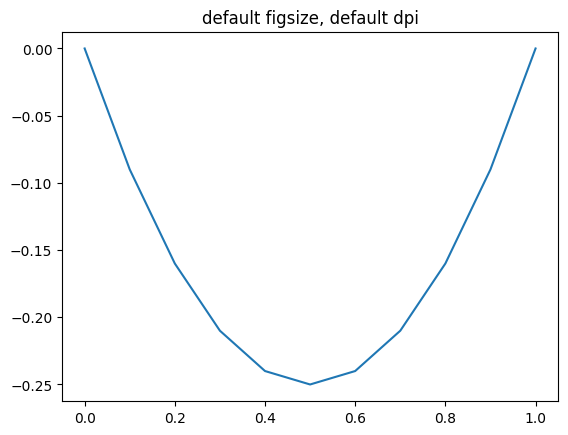

In [4]:
fig, ax = plt.subplots() # Matplotlib default figsize=(6.4,4.8) and dpi=100
ax.plot(x, y)
ax.set_title('default figsize, default dpi')
plt.show()

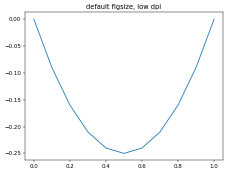

In [5]:
fig, ax = plt.subplots(dpi=40) # Matplotlib default figsize=(6.4,4.8), low dpi
ax.plot(x, y)
ax.set_title('default figsize, low dpi')
plt.show()

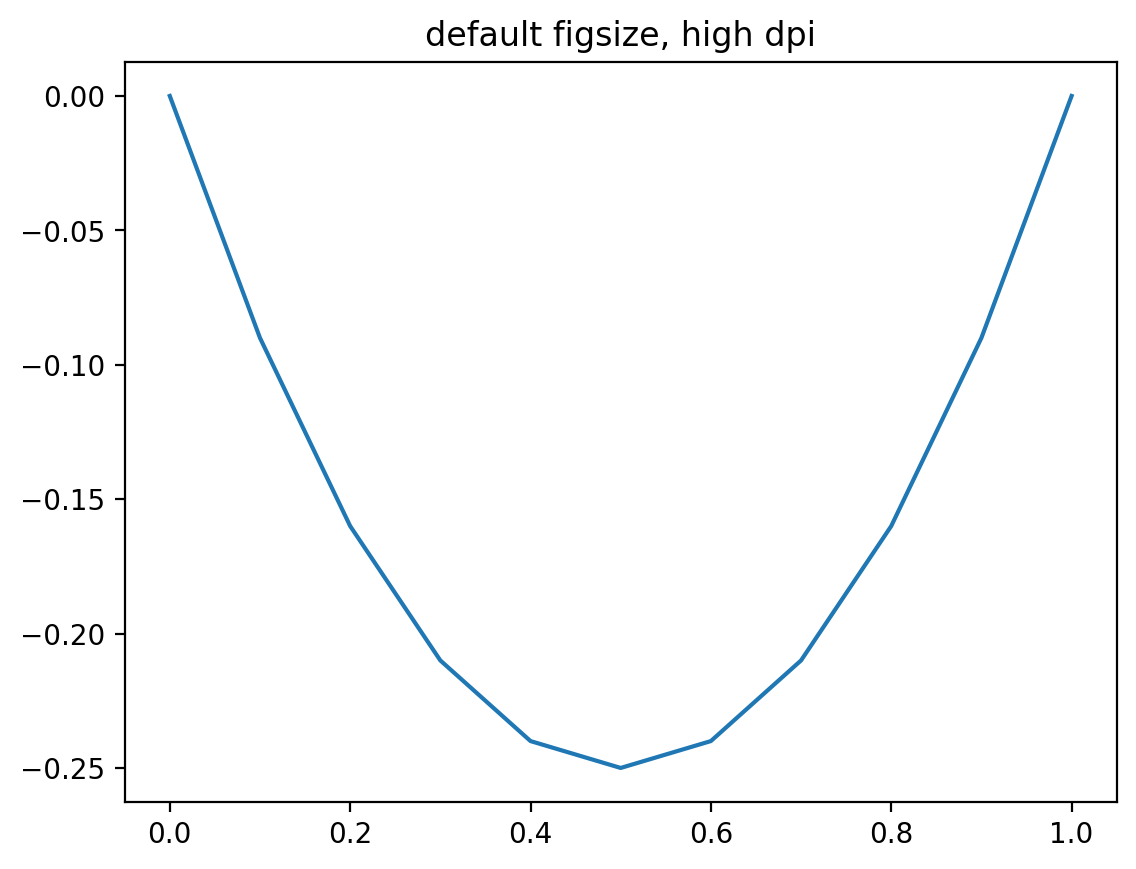

In [7]:
fig, ax = plt.subplots(dpi=200) # Matplotlib default figsize=(6.4,4.8), high dpi
ax.plot(x, y)
ax.set_title('default figsize, high dpi')
plt.show()

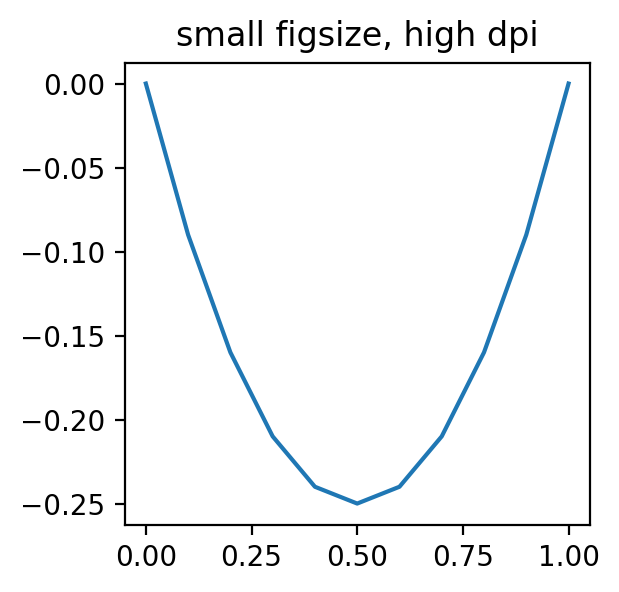

In [8]:
fig, ax = plt.subplots(figsize=(3,3), dpi=200) # Small figsize, high dpi
ax.plot(x, y)
ax.set_title('small figsize, high dpi')
plt.show()

If you want to upscale an image, don't change the sizes of elements in terms of how many points they take up, but rather change the DPI.

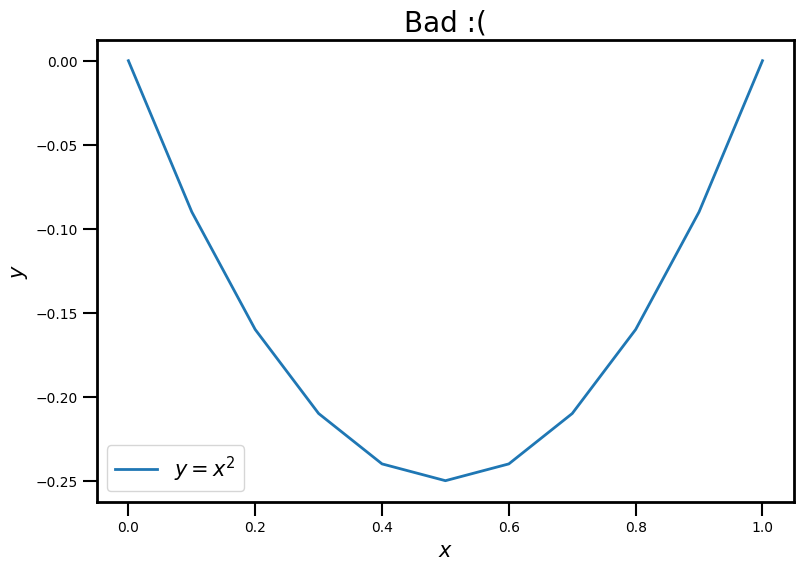

In [9]:
# Please don't do this! The default values are there for a reason

rcparams = {
    'axes.linewidth': 2,
    'figure.figsize': (9, 6),
    'xtick.major.size': 10,
    'xtick.major.width': 1.5,
    'ytick.major.size': 10,
    'ytick.major.width': 1.5,
    'axes.labelsize': 15,
    'legend.fontsize': 15,
    'lines.linewidth': 2
}
plt.rcParams.update(rcparams)

plt.plot(x, y, label='$y=x^2$')
plt.title('Bad :(', fontsize=20)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [10]:
# Reset rcparams to defaults
plt.rcParams.update(plt.rcParamsDefault)

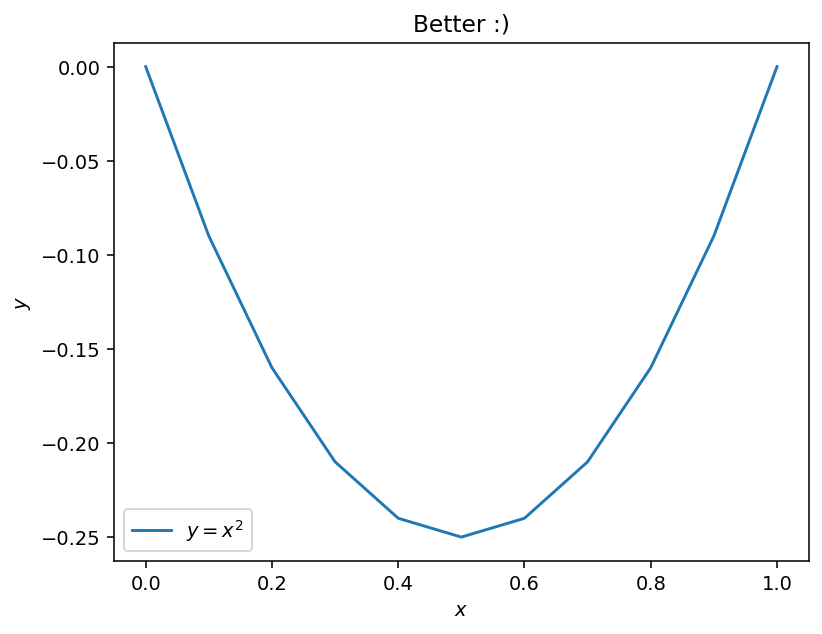

In [12]:
# Much better
rcparams = {
    'figure.dpi': 140,
}
plt.rcParams.update(rcparams)

plt.plot(x, y, label='$y=x^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Better :)')
plt.legend()
plt.show()

# 2. If you want consistent text formating in your figure vs article text, enable LaTeX rendering
By default, Matplotlib implements a lightweight TeX expression parser `Mathtext`, however we can load in the full thing

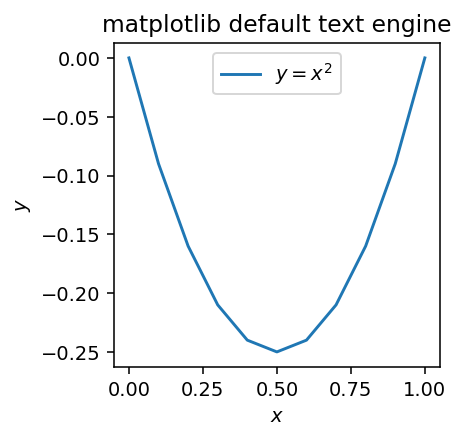

In [13]:
# Default matplotlib text rendering
fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(x, y, label='$y=x^2$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('matplotlib default text engine')
ax.legend()
plt.show()

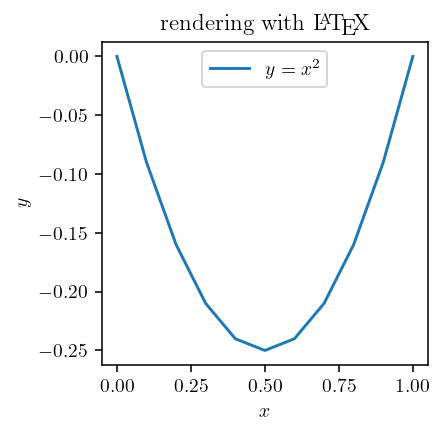

In [15]:
# With latex enabled (this requires latex to be installed on your system)
# Note that it can take time to load in. Disable it for faster plotting
rcparams = {
    'figure.dpi': 140,
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'cm'
}
plt.rcParams.update(rcparams)

fig, ax = plt.subplots(figsize=(3, 3))
ax.plot(x, y, label='$y=x^2$')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('rendering with \LaTeX')
ax.legend()
plt.show()

# 3. style sheets
You can load in various style sheets. e.g. for dark mode. Or you can create your own style sheets. If you use a lot of "rcparams" for all of your plots, creating a style sheet can be beneficial. You could create several style sheets, one for plots in presentation slides (e.g. dark mode) and one for plots in publications.

In [16]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [17]:
plt.style.use('dark_background')
#plt.style.use('classic')

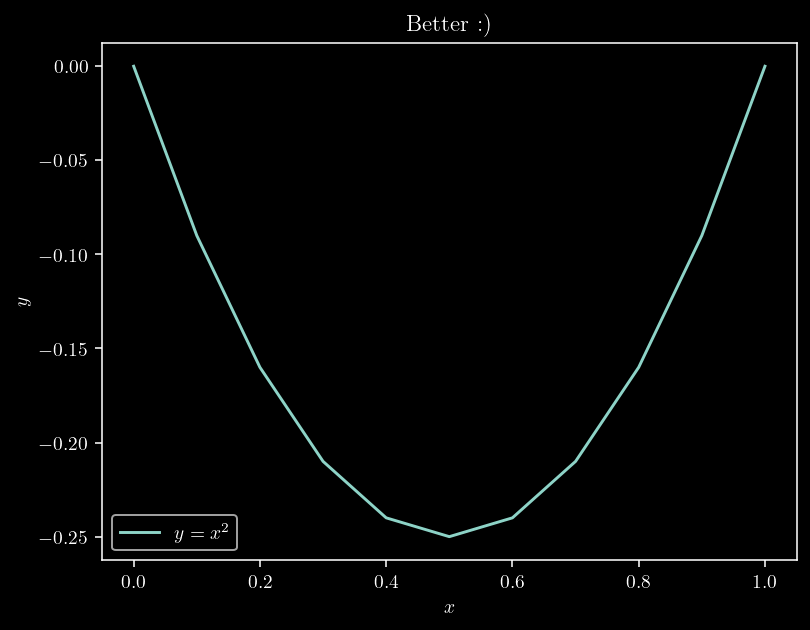

In [18]:
plt.plot(x, y, label='$y=x^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Better :)')
plt.legend()
plt.show()

In [20]:
# Reset rcparams
plt.rcParams.update(plt.rcParamsDefault)
rcparams = {
    'figure.dpi': 140,
    'text.usetex': True,
    'font.family': 'serif',
    'font.serif': 'cm'
}
plt.rcParams.update(rcparams)


Example style sheet for plots on slides.
Path where you save the style sheets (in this path there are also the default style sheets).

You can type the following command in your terminal to find the location where you have to save your style sheet.

```
find -name "*stylelib*"
```
This may return a few hits if you’ve got multiple python environments installed. Pick the directory corresponding to the environment you are using.
The following is the location of my style sheet.

```
anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/katrins-style-sheet-slides-plots.mplstyle
```

```
lines.linewidth : 5.0
lines.markersize : 10.0

patch.linewidth: 0.5
patch.facecolor: darkblue
patch.edgecolor: eeeeee
patch.antialiased: True

text.hinting_factor : 8

mathtext.fontset : cm

#axes.facecolor: eeeeee
axes.edgecolor: black
axes.grid :False
axes.titlesize: 25
axes.labelsize: 20
axes.linewidth: 4
#axes.prop_cycle: cycler('color', ['348ABD', 'A60628', '7A68A6', '467821', 'D55E00', 'CC79A7', '56B4E9', '009E73', 'F0E442', '0072B2'])
axes.prop_cycle: cycler('color', ['darkblue', 'darkred', '009E73','gold', 'darkorange', 'deeppink', 'darkviolet', 'limegreen', 'firebrick', 'darkgreen'])

grid.color: b2b2b2
grid.linestyle: --
grid.linewidth: 0.5

legend.fancybox: True
legend.fontsize: 16
legend.title_fontsize: 20

xtick.direction: out
ytick.direction: out
xtick.labelsize: 15
ytick.labelsize: 15
xtick.major.size: 8
ytick.major.size: 8
xtick.minor.size: 3
ytick.minor.size: 3
xtick.minor.width: 1.5
ytick.minor.width: 1.5
xtick.major.width: 3.5
ytick.major.width: 3.5

figure.dpi:300
figure.facecolor: white
figure.frameon: True
figure.figsize: 13.3, 7.5
savefig.dpi:300
```
This style sheet is used included as the defqault style sheets:
```
plt.style.use('katrins-style-sheet-slides-plots')
```


# 4. Passing repeat arguments with dictionary unpacking
If you pass the same arguments over and over again, it's sometimes easier easier to handle them using dictionary unpacking.

(website: https://book.pythontips.com/en/latest/args_and_kwargs.html)

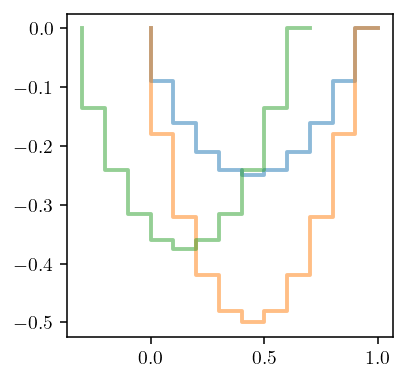

In [21]:
fig, ax = plt.subplots(figsize=(3, 3))

ax.plot(x, y, lw=2, alpha=0.5, ds='steps')
ax.plot(x, 2*y, lw=2, alpha=0.5, ds='steps')
ax.plot(x - 0.3, 1.5*y, lw=2, alpha=0.5, ds='steps')
plt.show()

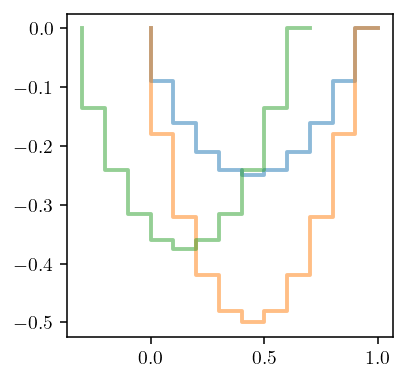

In [22]:
fig, ax = plt.subplots(figsize=(3, 3))

kw = dict(lw=2, alpha=0.5, ds='steps')

ax.plot(x, y, **kw)
ax.plot(x, 2*y, **kw)
ax.plot(x - 0.3, 1.5*y, **kw)
plt.show()

More

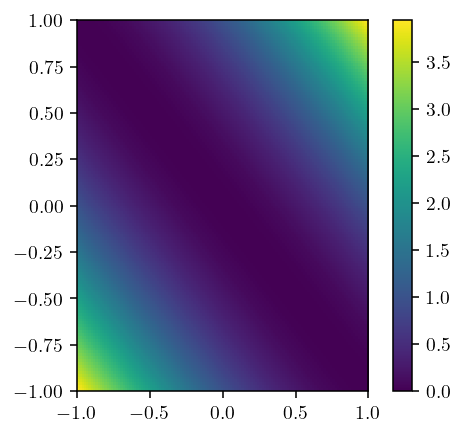

In [23]:
def plot_2d_func(func, lims=[(-1, 1), (-1, 1)], **kwargs):
  # This function creates a 2d histogram with a colorbar using imshow
  fig, axs = plt.subplots(
    1, 2, figsize=(3.2, 3),
    width_ratios=[3, 0.2],
    layout='compressed'
  )
  ax, cax = axs

  grid_size = 128
  x = np.linspace(*lims[0], grid_size + 1)
  y = np.linspace(*lims[1], grid_size + 1)
  X, Y = np.meshgrid(0.5 * (x[1:] + x[:-1]), 0.5 * (y[1:] + y[:-1]))
  z = np.reshape(func(X.ravel(), Y.ravel()), X.shape)

  im = ax.imshow(
    z,
    origin="lower",
    interpolation="nearest",
    aspect="auto",
    extent=lims[0] + lims[1],
    **kwargs
  )
  cb = fig.colorbar(im, cax=cax)
  return fig, axs

def example_func(x, y):
  return x**2 + y**2 + 2*x*y

plot_2d_func(example_func)
plt.show()

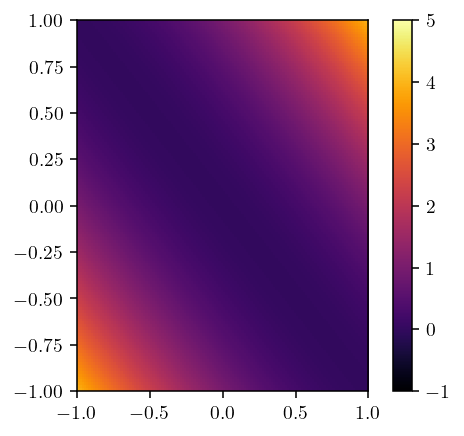

In [24]:
plot_2d_func(example_func, cmap='inferno', vmin=-1.0, vmax=5)
plt.show()

# 5. Multiple subplots and layout

Often when you have multiple subfigures, you need to juggle with the layout, specifying the padding and spacing between subplots and how they line up.

Easy start is to specify width_ratios and height_ratios when calling plt.subplots

Controling padding etc

1. plt.subplots_adjust(left, bottom, right, top, wspace, hspace) - You can control the padding between subplots. A pain.
2. Specifying the layout engine - tight, constrained, compressed. They're great, but can take away control.

  2.1 tight

  2.2 constrained

  2.3 compressed (my fav)

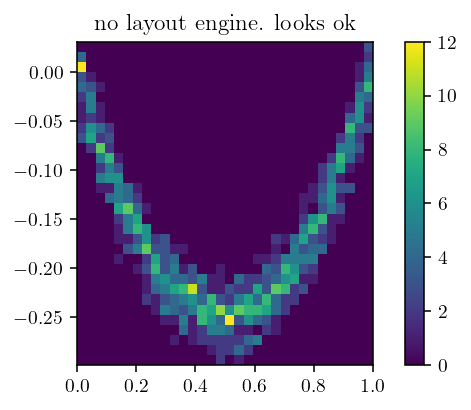

In [25]:
x_noisy, y_noisy = gen_data(n=1000, noise=0.02)

fig, axs = plt.subplots(1, 2, figsize=(3.2, 3), width_ratios=[3, 0.2])

ax, cax = axs
h = ax.hist2d(x_noisy, y_noisy, bins=(32, 32))
cb = fig.colorbar(h[3], cax=cax)
ax.set_title('no layout engine. looks ok')

plt.show()

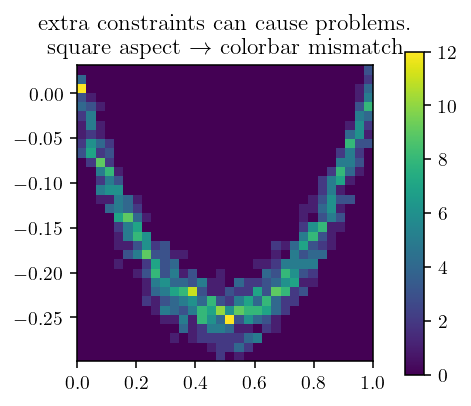

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(3.2, 3), width_ratios=[3, 0.2])

ax, cax = axs
h = ax.hist2d(x_noisy, y_noisy, bins=(32, 32))
cb = fig.colorbar(h[3], cax=cax)
ax.set_box_aspect(1)
ax.set_title("extra constraints can cause problems.\n square aspect $\\rightarrow$ colorbar mismatch")

plt.show()

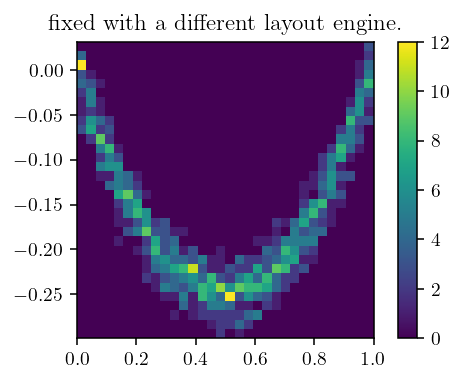

In [27]:
fig, axs = plt.subplots(
    1, 2, figsize=(3.2, 3),
    width_ratios=[3, 0.2],
    layout='compressed'
)

ax, cax = axs
h = ax.hist2d(x_noisy, y_noisy, bins=(32, 32))
cb = fig.colorbar(h[3], cax=cax)
ax.set_box_aspect(1)
ax.set_title("fixed with a different layout engine.")

plt.show()

# 6. More on layouts

Sometimes you want to take **full** control of the positioning and not let plt subplot grid do it for you.

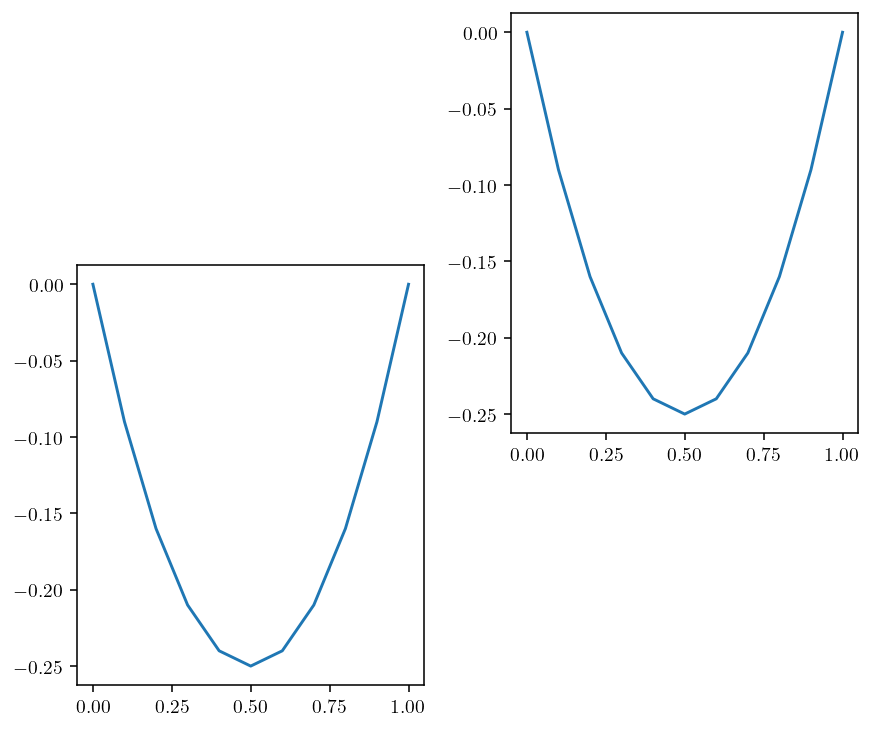

In [28]:
fig = plt.figure(figsize=(6.2, 6))

ax = fig.add_axes([0, 0, 0.4, 0.5]) # [x0, y0, wx, wy]
ax.plot(x, y)

ax = fig.add_axes([0.5, 0.3, 0.4, 0.5])
ax.plot(x, y)

plt.show()

### More esoteric axes stuff
1. Duplicating axes. [Docs.](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html)
2. Creating inset axes. [Example.](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/zoom_inset_axes.html)

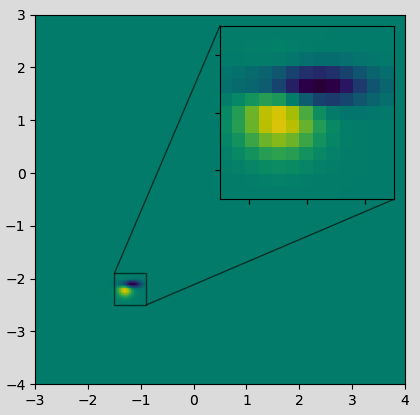

# 7. Customisable colorbar

1.   Listeneintrag
2.   Listeneintrag


You can create very individual plots by creating your own colorbars.

In [29]:
import matplotlib.colors as clr

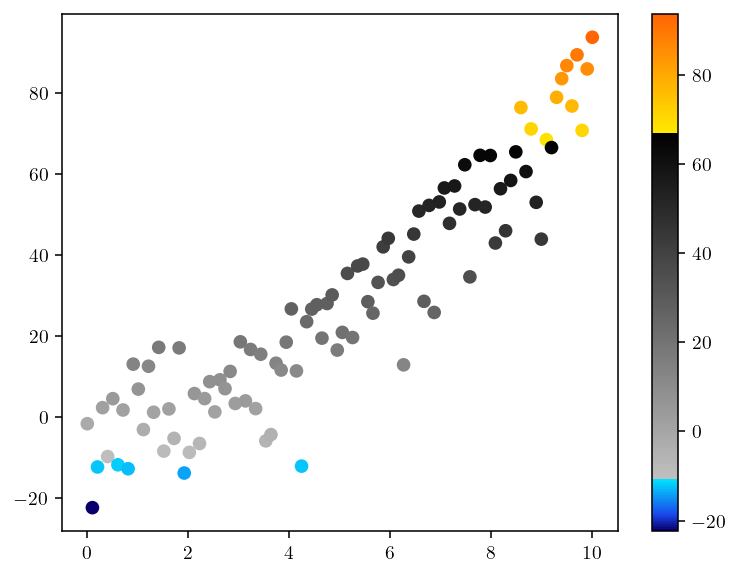

In [30]:
cmap_CCness_tcool = clr.LinearSegmentedColormap.from_list('custom CCness',
    [(0,'#09006E'),(0.03,'#1A47EB'),(0.1,'#00E5FF'),(0.1,'silver'),
    (0.4,'dimgray'),(0.77,'black'),(0.77,'#FFEA00'), (1, '#FF6505')], N=256
)
x2, y2 = gen_data(100, rescale=10, noise=10)

plt.scatter(x2, y2, c=y2, cmap=cmap_CCness_tcool)
plt.colorbar()
plt.show()


You can also extract colors from a colormap and use it to color your lines in a plot
(source: [Tutorial from matplotlib](https://matplotlib.org/stable/gallery/color/individual_colors_from_cmap.html))

In [ ]:
import matplotlib as mpl

n_lines = 21
cmap = mpl.colormaps['plasma']

# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines))

fig, ax = plt.subplots(layout='constrained')
print([mpl.colors.rgb2hex(color) for color in colors])

for i, color in enumerate(colors):
    ax.plot([0, i], color=color)

plt.show()

There are a lot more customizations possible. E.g. creating a discrete colormap from a continuous one, reversing colormaps....
[Matplotlib Tutorial](https://matplotlib.org/stable/users/explain/colors/index.html)

# 8. Uniform perception, and colourblind friendliness

## 8.1 The importance of uniform perception in [Matplotlib colourbars](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

### Introducing *Jet*, *Viridis*, and *Turbo*

What is the biggest problem of the rainbow (jet) colormap? The most apparent problem with this particular colormap is that it not perceptually uniform. Nore often than not, the change in colour of your plot is due to features of the colourmap, instead of changes in data!


  ![](https://drive.google.com/uc?export=view&id=1BPTxz1IFy-SB3JfWtA9eVsduNJ9i-RlB)



By “perceptually uniform,” I mean that equal changes in the value that we encode using a colormap should correspond to same changes in the color perception. This is not the case with the rainbow or the Jet colormaps:

  ![](https://drive.google.com/uc?export=view&id=1jO9YK6XnJR57E8Yhzr1huX606REwcdFy)


They have distinct bright and dark stripes within the number range, making them the wrong choice to encode numerical data. The situation is even worse for people with impaired color vision. Compare between the perceptual colour/lightness deltas for:

- Jet

  ![](https://drive.google.com/uc?export=view&id=1nTN6mLTkcRrrHEQoBvoxE9BWE4Fk5kpX)


- Viridis

  ![](https://drive.google.com/uc?export=view&id=1obkbqehekzyjJYfglW9PyOU43roWKRr8)

## (However!) The full story...

Still, in many applications, “rainbow maps” are preferred since they show more detail (at the expense of accuracy) and allow for quicker visual assessment. Therefore we need a 'fixed' jet map! Introducing Turbo:

- Turbo


  ![](https://drive.google.com/uc?export=view&id=1anv799mwa7A4iKhwSIJ6qak1TZ_hu1O8)

The resulting color map is not “perceptually linear” in the quantitative sense, but it is more smooth than Jet, without introducing false detail.


Turbo mimics the lightness profile of Jet, going from low to high back down to low, without banding:



  ![](https://drive.google.com/uc?export=view&id=1E-Xe-gukVeszmavVgeoTzc1Vy7XYNEAT)

  
Because of rapid color and lightness changes, Jet accentuates detail in the background that is less apparent with Viridis and even Inferno. Depending on the data, some detail may be lost entirely to the naked eye. The background in the following images is barely distinguishable with Inferno (which is already punchier than Viridis), but clear with Turbo.


  ![](https://drive.google.com/uc?export=view&id=1tLoNMhlCbE5QHRuS6XuBfOGtX_zCudrt)


## A really nice colourbar package - [CMasher](https://cmasher.readthedocs.io/index.html)

This package contains a collection of scientific colormaps for making stunning and cmashing plots, showcased in the online documentation. The colormaps in CMasher are all designed to be perceptually ***uniform sequential***, most of them are ***color vision deficiency (CVD; colorblind) friendly*** and they cover a wide range of different color combinations to accommodate for most applications. It offers several alternatives to commonly used colormaps, like:

1. chroma and rainforest for jet;
2. sunburst for hot;
3. neutral for binary;
4. and fusion and redshift for coolwarm.

# 8.2 Colourblind friendliness with [The Colourblindness Simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/)

If you are not suffering from a color vision deficiency it is very hard to imagine how it looks like to be colorblind. The Color BLIndness Simulator can close this gap for you. Just play around with it and get a feeling of how it is to have a color vision handicap.

- Try this out! [The Colourblindness Simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/)



Simply upload or drag-and-drop your plots. It is locally hosted and very light-weighted.

- Example:

![](https://drive.google.com/uc?export=view&id=1jOxLjoveY73p2u8tj-wxYLSjXOr1j2uW)





# 9. Save figures in vectorized format when you care about quality
e.g. for scientific publication

In [ ]:
plt.plot(x, y, label='$y=x^2$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.savefig('test.pdf', dpi=200)
plt.close()

# 10. Trimming the figure when saving
When using layout engines and whatnot, you often have situations where the subplots are adjusted in a way which leaves empty padding at the sides of the image. This can be cut off when saving by setting bbox_inches='tight'

In [ ]:
# TODO: This plot can be changed. The basic idea is simple, show how one of the pngs has extra whitespace at the edges, the other one doesn't
fig, axs = plt.subplots(
    1, 2, figsize=(3.2, 3),
    width_ratios=[3, 0.2],
    layout='compressed'
)

ax, cax = axs
h = ax.hist2d(x_noisy, y_noisy, bins=(32, 32), cmap=cmap_CCness_tcool)
cb = fig.colorbar(h[3], cax=cax)
ax.set_box_aspect(1)
plt.savefig('untrimmed.png')
plt.savefig('trimmed.png', bbox_inches='tight')
plt.show()

# Animations!

## Basics of animation

1. Initialising the plot

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

plt.style.use('dark_background')
fig, axs = plt.subplots(1, 1, dpi = 100, figsize = (3, 3))

point, = axs.plot([], [], 'ro')

2. Initialising the function

In [ ]:
def init():
  # set limits
  axs.set_xlim(0, 2*np.pi)
  axs.set_ylim(-1, 1)

  return

3. An update function - what happens in each frame?

In [ ]:
xvals = np.linspace(0, 2 * np.pi)

def update(frame):
  # goes through list for x values
  xpos = xvals[frame]
  # get y values from x values
  ypos = np.sin(xpos)

  point.set_data([xpos], [ypos])

  return point,

You're done!

In [ ]:
# create
ani = animation.FuncAnimation(fig=fig, func=update, init_func = init,\
                              frames = len(xvals), interval = 50)

# for animation in google collab
from matplotlib import rc
rc('animation', html='jshtml')
# display
ani